# Data Preparation

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the libraries used in the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [3]:
# importing data and reading it
pd.options.display.max_columns=None
data = pd.read_csv('bank-additional-full.csv', delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# counting null values of every column
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# checking datatypes and null values in each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [7]:
# shape of data
data.shape

(41188, 21)

In [8]:
#defaut features does not play imp role
data.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [9]:
# statistical aspects of the dataframe
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [10]:
# find missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


# Dealing with "unknown"

In [11]:
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable

Housing Unknown

In [12]:
# get a unique list values and drop 'unknown'
values = list(set(data.housing.values))
values.remove('unknown')
values

['no', 'yes']

In [13]:
# determine the weight of each value in the category 
prob = data[data['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [14]:
# check the current distribution of values
data.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [15]:
# impute the values for 'unknown'
data.housing = data.housing.map(lambda x: impute_values(x, values, prob))

In [16]:
# check the new distribution of values
data.housing.value_counts(normalize=True)

yes    0.534525
no     0.465475
Name: housing, dtype: float64

Loan Unknown

In [17]:
# get a unique list values and drop 'unknown'
values = list(set(data.loan.values))
values.remove('unknown')
values

['no', 'yes']

In [18]:
# determine the weight of each value in the category 
prob = data[data['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [19]:
# check the current distribution of values
data.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [20]:
# impute the values for 'unknown'
data.loan = data.loan.map(lambda x: impute_values(x, values, prob))

In [21]:
# check the new distribution of values
data.loan.value_counts(normalize=True)

no     0.844154
yes    0.155846
Name: loan, dtype: float64

Changing all the yes and no columns to 1 and 0.

In [22]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
data[col] = data[col].apply(convert)

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Explore Numerical Data

In [24]:
# list of numerical variables
numerik = [feature for feature in data.columns if ((data [feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerik))

# visualise the numerical variables
data[numerik].head()

Number of numerical variables:  13


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,0.0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,NaN,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,0.0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0.0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,0.0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [25]:
discrete_feature=[feature for feature in numerik if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [26]:
continuous_features=[feature for feature in numerik if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


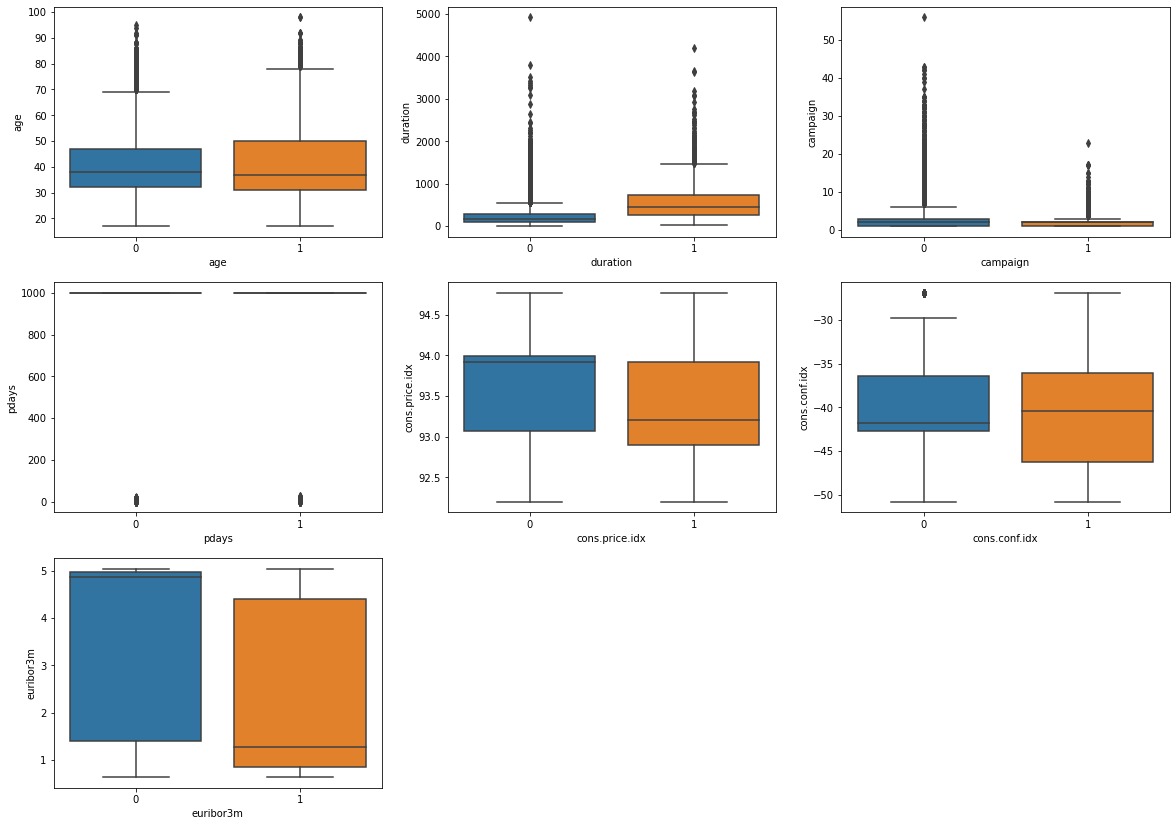

In [27]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

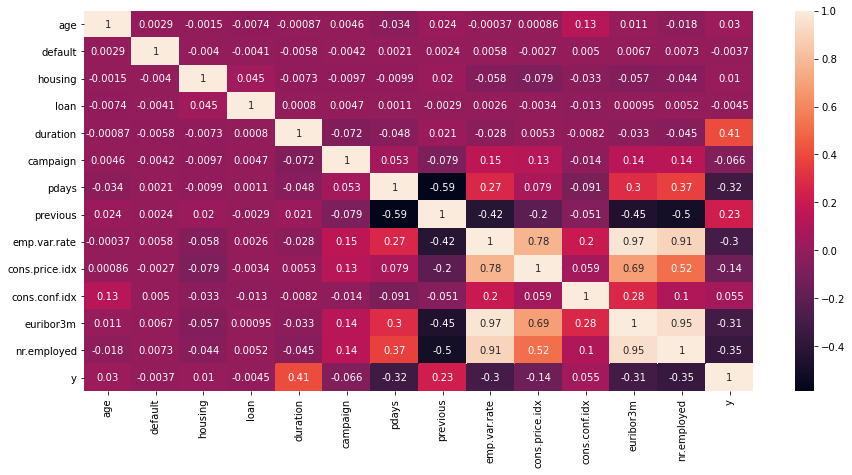

In [28]:
## Checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [29]:
#Check the Data set is balanced or not based on target values in classification
data['y'].groupby(data['y']).count()

y
0    36548
1     4640
Name: y, dtype: int64

# Explore Categorical Data

In [30]:
kategorikal=[feature for feature in data.columns if ((data [feature].dtypes=='O') & (feature not in ['y']))]
kategorikal

['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [31]:
for feature in kategorikal :
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3


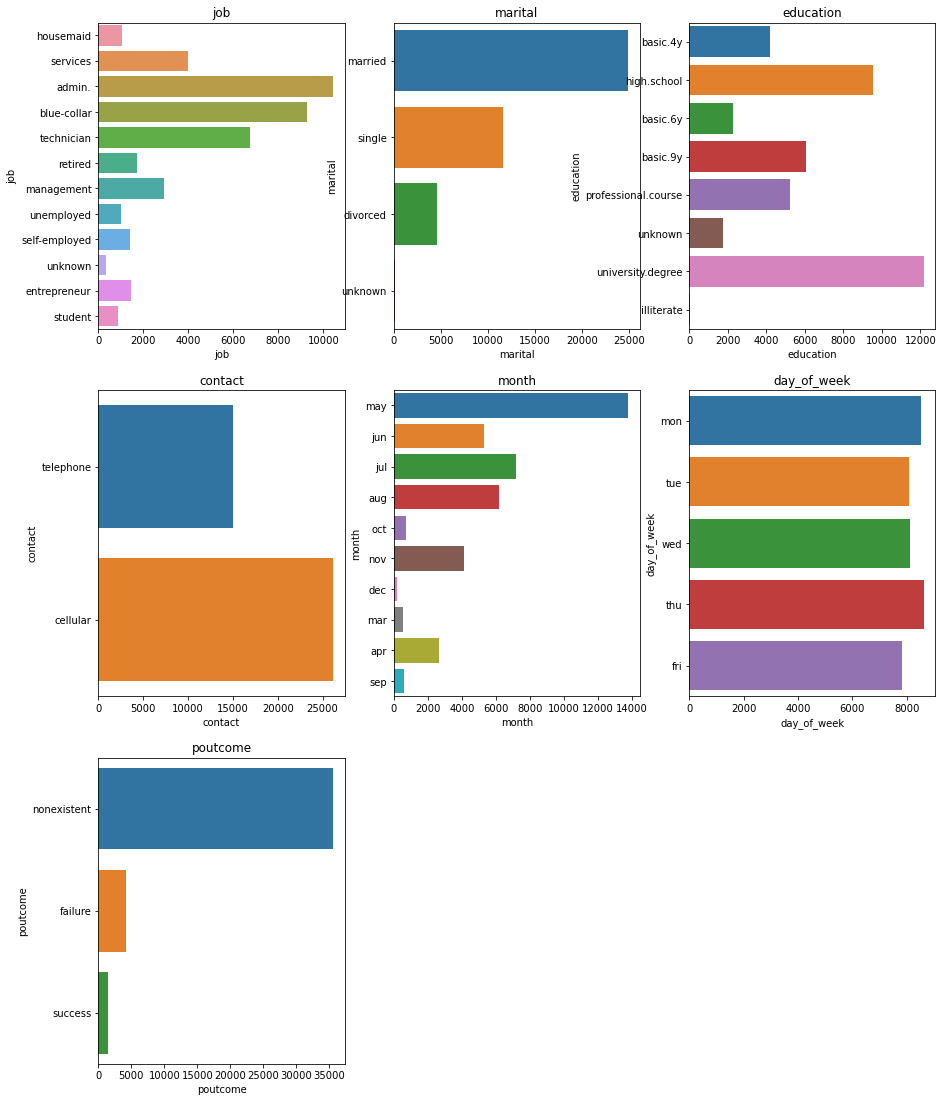

In [32]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for kategorikal in kategorikal :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=kategorikal ,data=data)
    plt.xlabel(kategorikal)
    plt.title(kategorikal)
    plotnumber+=1
plt.show()

Making dataframe of all the categorical columns to make dummy variables for all these categorical variables

In [33]:
kolom_kategorikal = data.select_dtypes(include=['object'])
kolom_kategorikal.head()

,job,marital,education,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,telephone,may,mon,nonexistent
1,services,married,high.school,telephone,may,mon,nonexistent
2,services,married,high.school,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,telephone,may,mon,nonexistent
4,services,married,high.school,telephone,may,mon,nonexistent


In [34]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(kolom_kategorikal,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


Feature Engineering

In [35]:
df2=data.copy()

In [36]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [37]:
df2.shape

(41188, 21)

Drop Unwanted Features

In [38]:
#defaut features does not play imp role
df2.groupby(['y','default']).size()

y  default
0  0.0        28391
   1.0            3
1  0.0         4197
dtype: int64

In [39]:
df2.drop(['default'],axis=1, inplace=True)

In [40]:
df2.groupby(['y','pdays']).size()

y  pdays
0  0            5
   1           18
   2           24
   3          141
   4           55
   5           17
   6          123
   7           20
   8            6
   9           29
   10          22
   11          13
   12          32
   13           8
   14           9
   15           8
   16           5
   17           6
   18           3
   19           2
   20           1
   22           1
   999      36000
1  0           10
   1            8
   2           37
   3          298
   4           63
   5           29
   6          289
   7           40
   8           12
   9           35
   10          30
   11          15
   12          26
   13          28
   14          11
   15          16
   16           6
   17           2
   18           4
   19           1
   21           2
   22           2
   25           1
   26           1
   27           1
   999       3673
dtype: int64

In [41]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

Remove Outliers

In [42]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

In [43]:
# remove outliers in feature duration...
df2.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y  duration
0  0            4
   1            3
   2            1
   3            3
   4           12
               ..
1  3094         1
   3183         1
   3631         1
   3643         1
   4199         1
Name: duration, Length: 2562, dtype: int64

In [44]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           15342
   2            9359
   3            4767
   4            2402
   5            1479
   6             904
   7             591
   8             383
   9             266
   10            213
   11            165
   12            122
   13             88
   14             68
   15             49
   16             51
   17             54
   18             33
   19             26
   20             30
   21             24
   22             17
   23             15
   24             15
   25              8
   26              8
   27             11
   28              8
   29             10
   30              7
   31              7
   32              4
   33              4
   34              3
   35              5
   37              1
   39              1
   40              2
   41              1
   42              2
   43              2
   56              1
1  1            2300
   2            1211
   3             574
   4             249
   5             120
 

In [45]:
df3 = df2[df2['campaign'] < 33]

In [46]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           15342
   2            9359
   3            4767
   4            2402
   5            1479
   6             904
   7             591
   8             383
   9             266
   10            213
   11            165
   12            122
   13             88
   14             68
   15             49
   16             51
   17             54
   18             33
   19             26
   20             30
   21             24
   22             17
   23             15
   24             15
   25              8
   26              8
   27             11
   28              8
   29             10
   30              7
   31              7
   32              4
1  1            2300
   2            1211
   3             574
   4             249
   5             120
   6              75
   7              38
   8              17
   9              17
   10             12
   11             12
   12              3
   13              4
   14              1
   15              2
 

In [47]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           32400
   1            3594
   2             404
   3              88
   4              32
   5               5
   6               2
   7               1
1  0            3141
   1             967
   2             350
   3             128
   4              38
   5              13
   6               3
Name: previous, dtype: int64

In [48]:
df4 = df3[df3['previous'] < 31]

In [50]:
day = pd.get_dummies(data['day_of_week'])

In [51]:
day

,fri,mon,thu,tue,wed
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
41183,1,0,0,0,0
41184,1,0,0,0,0
41185,1,0,0,0,0
41186,1,0,0,0,0


In [49]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [52]:
df4

,age,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,57,0,0,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,37,1,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,40,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,56,0,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41184,46,0,0,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41185,56,1,0,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41186,44,0,0,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [54]:
# subscription rate
round((sum(df4['y'])/len(df4.index))*100,2)

11.27

In [55]:
df4 = df4.drop(columns=['euribor3m', 'emp.var.rate'])

In [56]:
df4

,age,housing,loan,duration,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,261,1,0,93.994,-36.4,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,57,0,0,149,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,37,1,0,226,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,40,0,0,151,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,56,0,1,307,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,334,1,0,94.767,-50.8,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41184,46,0,0,383,1,0,94.767,-50.8,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41185,56,1,0,189,2,0,94.767,-50.8,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
41186,44,0,0,442,1,0,94.767,-50.8,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
